


# Reading the data




In [34]:
!pip install opendatasets
!pip install pandas-profiling[notebook]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.2 MB/s eta 0:00:00


In [35]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.impute import SimpleImputer
import opendatasets as od
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [39]:
dataset_url = 'https://www.kaggle.com/competitions/spaceship-titanic/data'
od.download(dataset_url)

Skipping, found downloaded files in "./spaceship-titanic" (use force=True to force download)


In [40]:
sample_submission = pd.read_csv("/content/spaceship-titanic/sample_submission.csv")
sample_submission.info()
print("---------------------------------------------")
sample_submission.describe()
print("---------------------------------------------")
print("Null count")
sample_submission.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB
---------------------------------------------
---------------------------------------------
Null count


PassengerId    0
Transported    0
dtype: int64

In [41]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [42]:
test = pd.read_csv("/content/spaceship-titanic/test.csv")
train = pd.read_csv("/content/spaceship-titanic/train.csv")
print(test.info())
print("---------------------------------------------")
print(test.describe())
print("---------------------------------------------")
print("Null count")
print(test.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None
---------------------------------------------
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   41

In [43]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [44]:
print(train.info())
print("---------------------------------------------")
print(train.describe())
print("---------------------------------------------")
print("Null count")
print(train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
---------------------------------------------
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.0

In [45]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
train.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [46]:
train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [47]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [48]:
train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [49]:
train.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

# Visualizations

## Correlation

Text(0.5, 1.0, 'Features Correlating with Transported')

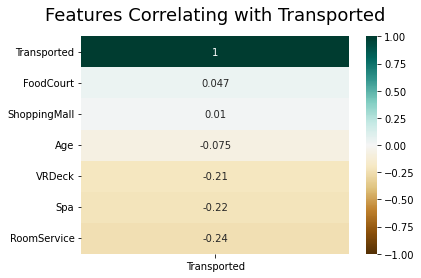

In [50]:
corr_df = train.corr()[['Transported']].sort_values(by='Transported', ascending=False)
heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Transported', fontdict={'fontsize':18}, pad=16)

## Pandas profiler

In [52]:
profile = ProfileReport(train, title="Spaceship Titanic report", explorative=True)

In [37]:
profile.to_widgets()["Balance"]

/usr/local/lib/python3.9/dist-packages/pandas_profiling/profile_report.py:405: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
profile.to_file("Spaceship Titanic report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocessing

## Primary

In [55]:
# Boolean to float
train["Transported"] = train["Transported"].astype(float) 
train["CryoSleep"] = train["CryoSleep"].astype(float) 
train["VIP"] = train["VIP"].astype(float) 
sample_submission["Transported"] = sample_submission["Transported"].astype(float)

In [56]:
drop_cols = ["PassengerId", "Cabin", "Name"]
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)

## Categorical data

In [57]:
# One-hot encoder

#Home Planet
ohe = OneHotEncoder(sparse=False)
HomePlanet_encoded = ohe.fit_transform(train[['HomePlanet']])
Planet_columns = ohe.get_feature_names_out(['HomePlanet'])
train = pd.concat([train.drop('HomePlanet', axis=1), pd.DataFrame(HomePlanet_encoded, columns=Planet_columns)], axis=1)
test = pd.concat([test.drop('HomePlanet', axis=1), pd.DataFrame(HomePlanet_encoded, columns=Planet_columns)], axis=1)
train = train.drop(columns='HomePlanet_nan')
test = test.drop(columns='HomePlanet_nan')

# CryoSleep
ohe = OneHotEncoder(sparse=False)
CryoSleep_encoded = ohe.fit_transform(train[['CryoSleep']])
CryoSleep_columns = ohe.get_feature_names_out(['CryoSleep'])
train = pd.concat([train.drop('CryoSleep', axis=1), pd.DataFrame(CryoSleep_encoded, columns=CryoSleep_columns)], axis=1)
test = pd.concat([test.drop('CryoSleep', axis=1), pd.DataFrame(CryoSleep_encoded, columns=CryoSleep_columns)], axis=1)
train = train.drop(columns='CryoSleep_nan')
test = test.drop(columns='CryoSleep_nan')

# Destiation
ohe = OneHotEncoder(sparse=False)
Destination_encoded = ohe.fit_transform(train[['Destination']])
Destination_columns = ohe.get_feature_names_out(['Destination'])
train = pd.concat([train.drop('Destination', axis=1), pd.DataFrame(Destination_encoded, columns=Destination_columns)], axis=1)
test = pd.concat([test.drop('Destination', axis=1), pd.DataFrame(Destination_encoded, columns=Destination_columns)], axis=1)
train = train.drop(columns='Destination_nan')
test = test.drop(columns='Destination_nan')

# VIP
ohe = OneHotEncoder(sparse=False)
VIP_encoded = ohe.fit_transform(train[['VIP']])
VIP_columns = ohe.get_feature_names_out(['VIP'])
train = pd.concat([train.drop('VIP', axis=1), pd.DataFrame(VIP_encoded, columns=VIP_columns)], axis=1)
test = pd.concat([test.drop('VIP', axis=1), pd.DataFrame(VIP_encoded, columns=VIP_columns)], axis=1)
train = train.drop(columns='VIP_nan')
test = test.drop(columns='VIP_nan')

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

In [58]:
train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0.0,CryoSleep_1.0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_0.0,VIP_1.0
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [59]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0.0,CryoSleep_1.0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_0.0,VIP_1.0
0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,20.0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## NaN values

In [60]:
# Numerical values imputing
imputer = IterativeImputer()
train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

## Standarization

In [61]:
# initialize StandardScaler object
scaler = StandardScaler()

# apply scaler to numerical column
test['Age'] = scaler.fit_transform(test[['Age']])
train['Age'] = scaler.fit_transform(train[['RoomService']])
test['RoomService'] = scaler.fit_transform(test[['RoomService']])
train['RoomService'] = scaler.fit_transform(train[['RoomService']])
test['FoodCourt'] = scaler.fit_transform(test[['FoodCourt']])
train['FoodCourt'] = scaler.fit_transform(train[['FoodCourt']])
test['ShoppingMall'] = scaler.fit_transform(test[['ShoppingMall']])
train['ShoppingMall'] = scaler.fit_transform(train[['ShoppingMall']])
test['Spa'] = scaler.fit_transform(test[['Spa']])
train['Spa'] = scaler.fit_transform(train[['Spa']])
test['VRDeck'] = scaler.fit_transform(test[['VRDeck']])
train['VRDeck'] = scaler.fit_transform(train[['VRDeck']])

## Summary

Text(0.5, 1.0, 'Features Correlating with Transported')

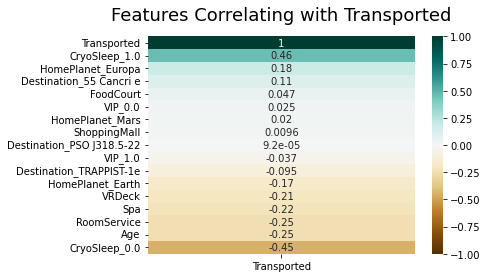

In [62]:
corr_df = train.corr()[['Transported']].sort_values(by='Transported', ascending=False)
heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Transported', fontdict={'fontsize':18}, pad=16)